<a href="https://colab.research.google.com/github/moronjie/finalYearProject/blob/main/finalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Augmented Images/Augmented Images/Others_augmented/NM04_01_13.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_00.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_01.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_02.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_03.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_04.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_05.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_06.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_07.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_08.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_09.jpg  
  inflating: Augmented Images/Augmented Images/Others_augm

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [ ]:
# Specify the directory containing your small dataset
dataset_directory = '/content/Fold1/Fold1/Fold1'

# Specify the target image dimensions
image_width, image_height = 150, 150

# Specify the batch size and number of epochs
batch_size = 16
num_epochs = 20

In [ ]:
# Create data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2451 images belonging to 3 classes.
Found 611 images belonging to 3 classes.


In [ ]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(image_width, image_height, 3)
)


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Freeze the base model layers
base_model.trainable = False

# Build the model with VGG16 base and custom top layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


NameError: ignored

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
153/153 [==============================] - 882s 6s/step - loss: -44.7316 - accuracy: 0.8374 - val_loss: -127.3026 - val_accuracy: 0.8405
Epoch 2/20
153/153 [==============================] - 877s 6s/step - loss: -276.6898 - accuracy: 0.8398 - val_loss: -486.1703 - val_accuracy: 0.8405
Epoch 3/20
153/153 [==============================] - 881s 6s/step - loss: -754.1028 - accuracy: 0.8407 - val_loss: -1095.1732 - val_accuracy: 0.8405
Epoch 4/20
153/153 [==============================] - 823s 5s/step - loss: -1468.9008 - accuracy: 0.8407 - val_loss: -1954.1052 - val_accuracy: 0.8421
Epoch 5/20
153/153 [==============================] - 860s 6s/step - loss: -2470.0537 - accuracy: 0.8407 - val_loss: -3035.8293 - val_accuracy: 0.8438
Epoch 6/20
153/153 [==============================] - 861s 6s/step - loss: -3664.8792 - accuracy: 0.8411 - val_loss: -4521.1699 - val_accuracy: 0.8405
Epoch 7/20
 31/153 [=====>........................] - ETA: 8:47 - loss: -4869.2012 - accuracy: 0.838

In [ ]:
# creating a test_generator for my final evaluation
test_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 3062 images belonging to 3 classes.


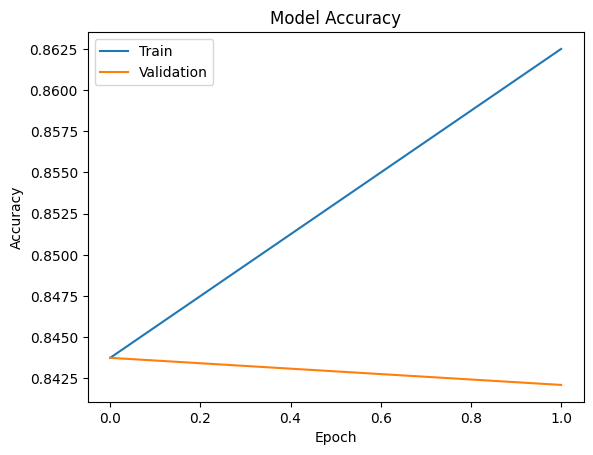

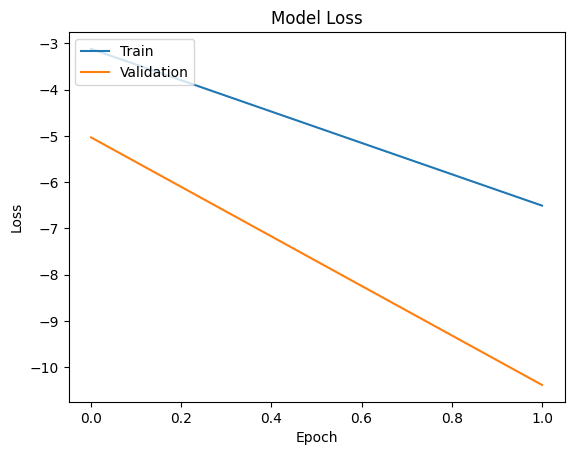

In [ ]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

192/192 [==============================] - 853s 4s/step - loss: -10.1743 - accuracy: 0.8406
Test Loss: -10.174345970153809
Test Accuracy: 0.8406270146369934


In [ ]:
# Calculate recall and precision
test_true = test_generator.classes
test_pred = model.predict(test_generator)
test_pred_binary = (test_pred > 0.5).astype(int).flatten()

recall = recall_score(test_true, test_pred_binary)
precision = precision_score(test_true, test_pred_binary)

print('Recall:', recall)
print('Precision:', precision)

NameError: ignored